## Embeddings

In [1]:
%pip install sklearn plotly chromadb openai

  Preparing metadata (setup.py) ... done


  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2951 sha256=ed5348ccda2755411cd632feb6fe6c650829e8f3a53516177b3ebcdfb499719f
  Stored in directory: /Users/ericmartinez/Library/Caches/pip/wheels/8e/21/72/6e096fe9f5263038bd31fdf055d8e30f117956f015faba3c06
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


**Definition:**  
Embeddings are a form of representation that converts high-dimensional data into a lower-dimensional vector space.

**Use in NLP:**  
In Natural Language Processing (NLP), embeddings represent words or phrases in a vector space. The position of each word is learned during training based on its context, meaning, and usage.

**Benefits:**  
- Reduces dimensionality of input data.
- Captures semantic relationships between words.

**Example:**  
In a well-trained model, the vector difference between the embeddings for "king" and "queen" might be similar to the difference between "man" and "woman".

**Use in Image Processing:**  
Each image is represented as a dense vector of floating point values. These vectors are learned from the data and are adjusted during training to help the model better understand the relationships between different images.

**Benefits:**  
- Reduces dimensionality of image data.
- Captures semantic relationships between images.

**Example:**  
In a well-trained model, similar images (like pictures of the same object from different angles) would be close to each other in the embedding space.

## Comparing Vector Similarities: Cosine Similarity

**Definition:**  
Cosine similarity is a measure of similarity between two non-zero vectors. It is calculated as the cosine of the angle between these vectors, which gives a measure that normalizes for their magnitude.

**Formula:**  
Cosine Similarity = (A . B) / (||A|| ||B||)

**Use in Embeddings:**  
In the context of embeddings, cosine similarity is often used to measure how similar two word or image embeddings are. 

**Benefits:**  
- It can capture semantic similarities in high-dimensional spaces.

**Example:**  
In a well-trained model, the cosine similarity between the embeddings for "king" and "queen" would be high, indicating that these words are semantically similar.

## Experiments

In [1]:
# You don't need to change this, just run this cell
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.
import openai

In [2]:
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return openai.Embedding.create(input = [text], model=model)['data'][0]['embedding']

In [3]:
king_vec = get_embedding("king")
print(len(king_vec))

1536


In [9]:
queen_vec = get_embedding("queen")
print(queen_vec)

[-0.0044449977576732635, -0.006651759147644043, -0.002411350142210722, -0.018185671418905258, -0.016884695738554, 0.010421788319945335, -0.007679948583245277, -0.024228909984230995, -0.017262399196624756, -0.013184611685574055, 0.014506570063531399, 0.02231241948902607, 0.014464602805674076, -0.0027890524361282587, -0.01852140575647354, 0.00889698974788189, 0.0435057207942009, 0.02106740139424801, 0.029404832050204277, -0.00907884631305933, 0.0020528824534267187, 0.014226790517568588, -0.005214391276240349, 0.0037875156849622726, -0.005371767561882734, -0.010155998170375824, 0.007018969394266605, -0.005686519667506218, 0.0014015206834301353, -0.015513776801526546, 0.009582449682056904, 0.005927829537540674, -0.023739295080304146, -0.015611698850989342, -0.024984315037727356, -0.009155785664916039, 0.008883001282811165, 0.0012834887020289898, -0.011463967151939869, -0.00579143688082695, 0.007351208012551069, 0.010463755577802658, -0.00016557266644667834, 0.021780839189887047, -0.0018045

In [72]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity([king_vec],[queen_vec])
print(cos_sim) 

NameError: name 'queen_vec' is not defined

In [11]:
man_vec = get_embedding("man")

In [12]:
cos_sim = cosine_similarity([king_vec], [man_vec])
print(cos_sim)

[[0.81407338]]


In [13]:
cos_sim = cosine_similarity([queen_vec], [man_vec])
print(cos_sim)

[[0.82615206]]


In [14]:
import numpy as np
unknown_vec = np.array(queen_vec) + np.array(man_vec)
cos_sim = cosine_similarity([king_vec], [unknown_vec])
print(cos_sim)

[[0.90506992]]


In [4]:
words = [
    "school is amazing",
    "I hate school",
    "I loathe school",
    "I had breakfast this morning",
    "sunrise on the beach",
    "morning paradise",
    "I walked the dog",
    "I hate breakfast",
    "I don't eat in the morning"
]

In [5]:
import pandas as pd

df = pd.DataFrame(words, columns=['Words'])
display(df) 

Words
0             school is amazing
1                 I hate school
2               I loathe school
3  I had breakfast this morning
4          sunrise on the beach
5              morning paradise
6              I walked the dog
7              I hate breakfast
8    I don't eat in the morning

In [6]:
from openai.embeddings_utils import get_embeddings
word_embeddings = get_embeddings(words, engine="text-embedding-ada-002")
print(word_embeddings)

[[0.007307492196559906, 0.007434138562530279, -0.012025067582726479, -0.045871295034885406, -0.034118518233299255, 0.013817112892866135, -0.01636270433664322, -0.024607378989458084, -0.011493152938783169, -0.026165129616856575, 0.005467954557389021, 0.019288234412670135, 0.016590667888522148, 0.006177173927426338, 0.01567881368100643, -0.01947820372879505, 0.04260382056236267, -0.020428050309419632, -0.009530135430395603, -0.005353972781449556, -0.007921727374196053, 0.017464525997638702, -0.009948068298399448, -0.016071418300271034, -0.002870122203603387, -0.0058890534564852715, 0.01614740490913391, -0.024404745548963547, 0.007079529110342264, -0.014564326032996178, 0.02159319631755352, -0.0029081159736961126, -0.0325227752327919, -0.031028347089886665, -0.007123855408281088, -0.005775072146207094, -0.020807988941669464, -0.016160069033503532, -0.008744928054511547, 0.015108905732631683, 0.01588144712150097, -0.026545068249106407, 0.007579782046377659, 0.006325983442366123, -0.0235435

In [7]:
df['Embeddings'] = word_embeddings
display(df)

Words  \
0             school is amazing   
1                 I hate school   
2               I loathe school   
3  I had breakfast this morning   
4          sunrise on the beach   
5              morning paradise   
6              I walked the dog   
7              I hate breakfast   
8    I don't eat in the morning   

                                          Embeddings  
0  [0.007307492196559906, 0.007434138562530279, -...  
1  [-0.009889303706586361, 0.007680651266127825, ...  
2  [-0.018368177115917206, 0.014976143836975098, ...  
3  [-0.004549055825918913, -0.010725009255111217,...  
4  [0.0014311253326013684, -0.016815923154354095,...  
5  [-0.0013415783178061247, 0.0021521325688809156...  
6  [-0.0070979841984808445, 0.0017257288563996553...  
7  [-0.017002025619149208, 0.0031707154121249914,...  
8  [-0.0038059616927057505, -0.000723602599464356...

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(word_embeddings)
df["embed_vis"] = vis_dims.tolist()
display(df)

Words  \
0             school is amazing   
1                 I hate school   
2               I loathe school   
3  I had breakfast this morning   
4          sunrise on the beach   
5              morning paradise   
6              I walked the dog   
7              I hate breakfast   
8    I don't eat in the morning   

                                          Embeddings  \
0  [0.007307492196559906, 0.007434138562530279, -...   
1  [-0.009889303706586361, 0.007680651266127825, ...   
2  [-0.018368177115917206, 0.014976143836975098, ...   
3  [-0.004549055825918913, -0.010725009255111217,...   
4  [0.0014311253326013684, -0.016815923154354095,...   
5  [-0.0013415783178061247, 0.0021521325688809156...   
6  [-0.0070979841984808445, 0.0017257288563996553...   
7  [-0.017002025619149208, 0.0031707154121249914,...   
8  [-0.0038059616927057505, -0.000723602599464356...   

                                           embed_vis  
0  [0.23689210450650036, -0.2883137420900315, -0....  
1  [0.36029722442630874, 0.018407211707989687, -0...  
2  [0.35333792000422726, 0.03366568393407102, -0....  
3  [-0.22513401860870472, 0.1346719755075038, 0.0...  
4  [-0.2375818219530207, -0.2245274868315703, -0....  
5  [-0.2512408157251222, -0.16222132645084622, -0...  
6  [-0.13841434884320483, -0.09054974828867023, 0...  
7  [0.023049844408236216, 0.30237693660896814, -0...  
8  [-0.12120608821522035, 0.27649049590258556, -0...

In [20]:
%pip install plotly 

Note: you may need to restart the kernel to use updated packages.


In [10]:
import plotly.express as px

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(df['embed_vis'].to_list(), columns=['x', 'y', 'z'])
df_pca['Words'] = df['Words']

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df_pca, x='x', y='y', z='z', text='Words', color='Words', color_discrete_sequence=px.colors.qualitative.Bold)

# Show the plot
fig.show()

## Embeddings in Practice

- We don't want to re-compute embeddings for things that we might do often
- To solve this we use a _vector database_ which is like a regular database only that it is optimized for storing vectors
- Vector databases will typically have built-in functionality for searching using cosine similarity
- Traditional databases are more optimized for exact match searching using SQL

In [41]:
datafile_path = "data/tmdb_movies_5000.csv"
movies_df = pd.read_csv(datafile_path)
display(movies_df)

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4798                                                NaN    9367   
4799                                                NaN   72766   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4801                        http://shanghaicalling.com/  126186   
4802                                                NaN   25975   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   
4799                                                 []                en   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...                en   
4801                                                 []                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4798                               El Mariachi   
4799                                 Newlyweds   
4800                 Signed, Sealed, Delivered   
4801                          Shanghai Calling   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4799  A newlywed couple's honeymoon is upended by th...    0.642552   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4801  When ambitious New York attorney Sam is sent t...    0.857008   
4802  Ever since the second grade when he first saw ... 

In [42]:
# Select the "id", "title", and "overview" columns
movies_df = movies_df[["id", "title", "overview", "release_date"]].copy()

# drop columns that have NaNs
movies_df_clean = movies_df.dropna()

# Display the new DataFrame
display(movies_df_clean)

id                                     title  \
0      19995                                    Avatar   
1        285  Pirates of the Caribbean: At World's End   
2     206647                                   Spectre   
3      49026                     The Dark Knight Rises   
4      49529                               John Carter   
...      ...                                       ...   
4798    9367                               El Mariachi   
4799   72766                                 Newlyweds   
4800  231617                 Signed, Sealed, Delivered   
4801  126186                          Shanghai Calling   
4802   25975                         My Date with Drew   

                                               overview release_date  
0     In the 22nd century, a paraplegic Marine is di...   2009-12-10  
1     Captain Barbossa, long believed to be dead, ha...   2007-05-19  
2     A cryptic message from Bond’s past sends him o...   2015-10-26  
3     Following the death of District Attorney Harve...   2012-07-16  
4     John Carter is a war-weary, former military ca...   2012-03-07  
...                                                 ...          ...  
4798  El Mariachi just wants to play his guitar and ...   1992-09-04  
4799  A newlywed couple's honeymoon is upended by th...   2011-12-26  
4800  "Signed, Sealed, Delivered" introduces a dedic...   2013-10-13  
4801  When ambitious New York attorney Sam is sent t...   2012-05-03  
4802  Ever since the second grade when he first saw ...   2005-08-05  

[4799 rows x 4 columns]

In [43]:
# Add a new column that is the concatenation of the "title" and "overview" columns
movies_df_clean['text'] = movies_df_clean['title'] + " " + movies_df_clean['overview']

# Display the updated DataFrame
display(movies_df_clean)

/var/folders/93/kmn7sjzd6gx6c0h6dgdt2src0000gn/T/ipykernel_66608/2689804733.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id                                     title  \
0      19995                                    Avatar   
1        285  Pirates of the Caribbean: At World's End   
2     206647                                   Spectre   
3      49026                     The Dark Knight Rises   
4      49529                               John Carter   
...      ...                                       ...   
4798    9367                               El Mariachi   
4799   72766                                 Newlyweds   
4800  231617                 Signed, Sealed, Delivered   
4801  126186                          Shanghai Calling   
4802   25975                         My Date with Drew   

                                               overview release_date  \
0     In the 22nd century, a paraplegic Marine is di...   2009-12-10   
1     Captain Barbossa, long believed to be dead, ha...   2007-05-19   
2     A cryptic message from Bond’s past sends him o...   2015-10-26   
3     Following the death of District Attorney Harve...   2012-07-16   
4     John Carter is a war-weary, former military ca...   2012-03-07   
...                                                 ...          ...   
4798  El Mariachi just wants to play his guitar and ...   1992-09-04   
4799  A newlywed couple's honeymoon is upended by th...   2011-12-26   
4800  "Signed, Sealed, Delivered" introduces a dedic...   2013-10-13   
4801  When ambitious New York attorney Sam is sent t...   2012-05-03   
4802  Ever since the second grade when he first saw ...   2005-08-05   

                                                   text  
0     Avatar In the 22nd century, a paraplegic Marin...  
1     Pirates of the Caribbean: At World's End Capta...  
2     Spectre A cryptic message from Bond’s past sen...  
3     The Dark Knight Rises Following the death of D...  
4     John Carter John Carter is a war-weary, former...  
...                                                 ...  
4798  El Mariachi El Mariachi just wants to play his...  
4799  Newlyweds A newlywed couple's honeymoon is upe...  
4800  Signed, Sealed, Delivered "Signed, Sealed, Del...  
4801  Shanghai Calling When ambitious New York attor...  
4802  My Date with Drew Ever since the second grade ...  

[4799 rows x 5 columns]

## Chroma: An Easy-to-Use Vector Database

Chroma DB is an open-source vector store used for storing and retrieving vector embeddings. Its main use is to save embeddings along with metadata to be used later by large language models.

In [44]:
%pip install --quiet chromadb

Note: you may need to restart the kernel to use updated packages.


Create a Chroma Client

In [45]:
import chromadb

## Use this one to save to memory
# chroma_client = chromadb.Client() 

## Use this one to save to disk
chroma_client = chromadb.PersistentClient(path=".")

Use OpenAI for embeddings

In [47]:
# You don't need to change this, just run this cell
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.
import os

from chromadb.utils import embedding_functions

openai_ef = embedding_functions.OpenAIEmbeddingFunction(
                api_key=os.getenv("OPENAI_API_KEY"),
                api_base=os.getenv("OPENAI_API_BASE"),
                model_name="text-embedding-ada-002"
            )

In [48]:
collection = chroma_client.get_or_create_collection(name="movies_example_for_realziez", embedding_function=openai_ef)

In [50]:
# Define the batch size
batch_size = 100

# Create lists of documents, metadatas, and ids using list comprehension
documents = [row['text'] for i, row in movies_df_clean.iterrows()]
metadatas = [{"source": "tmdb_movies_5000.csv", "title": row["title"], "overview": row["overview"], "release_date": row["release_date"]} for _, row in movies_df_clean.iterrows()]
ids = [str(row['id']) for i, row in movies_df_clean.iterrows()]

# Calculate the number of batches
num_batches = len(documents) // batch_size + (len(documents) % batch_size != 0)

# Process the data in batches
for i in range(num_batches):
    print(f"Adding batch {i+1}/{num_batches}")
    start_index = i * batch_size
    end_index = start_index + batch_size

    # Add the batch to the Chroma collection (triggers OpenAI embeddings for each document under the hood)
    collection.add(
        documents=documents[start_index:end_index],
        metadatas=metadatas[start_index:end_index],
        ids=ids[start_index:end_index]
    )

Adding batch 1/48
Adding batch 2/48
Adding batch 3/48
Adding batch 4/48
Adding batch 5/48
Adding batch 6/48
Adding batch 7/48
Adding batch 8/48
Adding batch 9/48
Adding batch 10/48
Adding batch 11/48
Adding batch 12/48
Adding batch 13/48
Adding batch 14/48
Adding batch 15/48
Adding batch 16/48
Adding batch 17/48
Adding batch 18/48
Adding batch 19/48
Adding batch 20/48
Adding batch 21/48
Adding batch 22/48
Adding batch 23/48
Adding batch 24/48
Adding batch 25/48
Adding batch 26/48
Adding batch 27/48
Adding batch 28/48
Adding batch 29/48
Adding batch 30/48
Adding batch 31/48
Adding batch 32/48
Adding batch 33/48
Adding batch 34/48
Adding batch 35/48
Adding batch 36/48
Adding batch 37/48
Adding batch 38/48
Adding batch 39/48
Adding batch 40/48
Adding batch 41/48
Adding batch 42/48
Adding batch 43/48
Adding batch 44/48
Adding batch 45/48
Adding batch 46/48
Adding batch 47/48
Adding batch 48/48


In [62]:
n_results = 10
results = collection.query(
    query_texts=["kid stuck at home on christmas"],
    n_results=n_results
)

In [63]:
print(results)

{'ids': [['18147', '771', '13673', '244534', '772', '10719', '10147', '175541', '9089', '850']], 'distances': [[0.30167949199676514, 0.3053942322731018, 0.32435017824172974, 0.33374677366756567, 0.3432518243789673, 0.34910106658935547, 0.3520730435848236, 0.3568553328514099, 0.36702924966812134, 0.36729276180267334]], 'metadatas': [[{'overview': 'Five disparate kids snowed in at the airport on Christmas Eve learn some lessons about friendship when they launch a bid to get back to their families and outsmart a disgruntled airport official who wants to keep them grounded.', 'release_date': '2006-12-08', 'source': 'tmdb_movies_5000.csv', 'title': 'Unaccompanied Minors'}, {'overview': "Eight-year-old Kevin McCallister makes the most of the situation after his family unwittingly leaves him behind when they go on Christmas vacation. But when a pair of bungling burglars set their sights on Kevin's house, the plucky kid stands ready to defend his territory. By planting booby traps galore, ador

In [64]:
for i in range(n_results):
    title = results["metadatas"][0][i]["title"]
    overview = results["metadatas"][0][i]["overview"]
    release_date =  results["metadatas"][0][i]["release_date"]
    
    print(f"\nResult {i+1}:")
    print(title)
    print(overview)
    print(f"Released: {release_date}")


Result 1:
Unaccompanied Minors
Five disparate kids snowed in at the airport on Christmas Eve learn some lessons about friendship when they launch a bid to get back to their families and outsmart a disgruntled airport official who wants to keep them grounded.
Released: 2006-12-08

Result 2:
Home Alone
Eight-year-old Kevin McCallister makes the most of the situation after his family unwittingly leaves him behind when they go on Christmas vacation. But when a pair of bungling burglars set their sights on Kevin's house, the plucky kid stands ready to defend his territory. By planting booby traps galore, adorably mischievous Kevin stands his ground as his frantic mother attempts to race home before.
Released: 1990-11-09

Result 3:
Christmas with the Kranks
Luther Krank is fed up with the commerciality of Christmas; he decides to skip the holiday and go on a vacation with his wife instead. But when his daughter decides at the last minute to come home, he must put together a holiday celebrat

In [57]:
results_list = []

for i in range(n_results):
    id = results["ids"][0][i]
    title = results["metadatas"][0][i]["title"]
    overview = results["metadatas"][0][i]["overview"]
    results_list.append([id, title, overview])
    
results_df = pd.DataFrame(results_list, columns=['id', 'title', 'overview'])
display(results_df)

id                           title  \
0     771                      Home Alone   
1   18147            Unaccompanied Minors   
2  244534                 Happy Christmas   
3   13673       Christmas with the Kranks   
4     772  Home Alone 2: Lost in New York   
5   10147                       Bad Santa   
6     850               A Christmas Story   
7   73191                  The Nutcracker   
8   12193                Four Christmases   
9   10719                             Elf   

                                            overview  
0  Eight-year-old Kevin McCallister makes the mos...  
1  Five disparate kids snowed in at the airport o...  
2  After a breakup with her boyfriend, a young wo...  
3  Luther Krank is fed up with the commerciality ...  
4  Instead of flying to Florida with his folks, K...  
5  A miserable conman and his partner pose as San...  
6  The comic mishaps and adventures of a young bo...  
7  On Christmas Eve, a little girl named Marie (C...  
8  Brad and Kate have made something of an art fo...  
9  When young Buddy falls into Santa's gift sack ...

## Image Embeddings

In [139]:
%pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /private/var/folders/93/kmn7sjzd6gx6c0h6dgdt2src0000gn/T/pip-req-build-m7z98bg4
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /private/var/folders/93/kmn7sjzd6gx6c0h6dgdt2src0000gn/T/pip-req-build-m7z98bg4
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 480.8 kB/s eta 0:00:00 kB/s eta 0:00:01
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369500 sha256=71cea8f4a75ea7007d5a6366340186d7a15fd2f9127fc950d0820516a3f158a0
  Stored in directory: /private/var/folders/93/kmn7sjzd6gx6c0h6dgdt2src0000gn/T/pip-ephem-wheel-cache-eyz77eb2/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
Note: you may need to restart the kernel to use updated packages.


Using image from the internet

In [66]:
from PIL import Image
import requests

url = "https://thumbor.forbes.com/thumbor/fit-in/1290x/https://www.forbes.com/advisor/wp-content/uploads/2023/07/top-20-small-dog-breeds.jpeg.jpg"
raw_image = Image.open(requests.get(url, stream=True).raw)

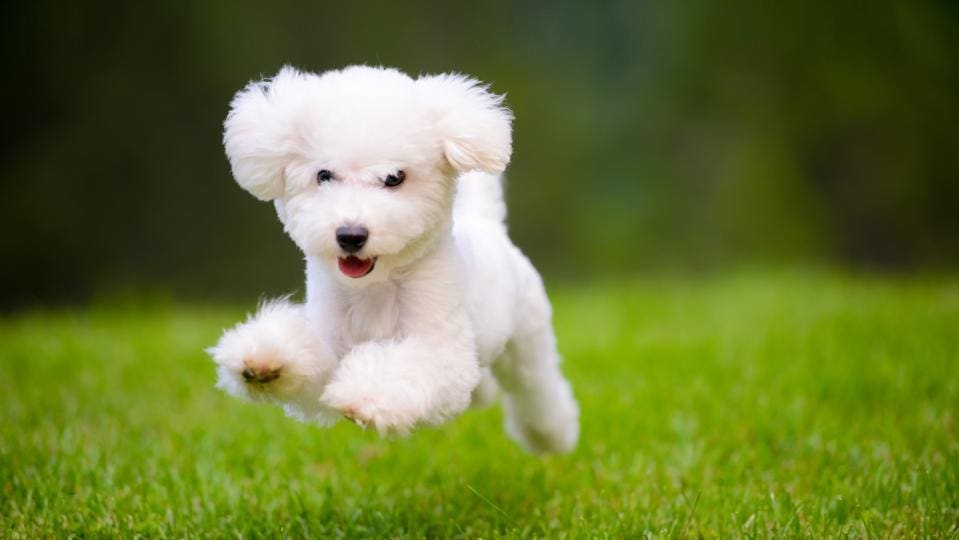

In [67]:
display(raw_image)

In [68]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(raw_image).unsqueeze(0).to(device)
text = clip.tokenize(["a princess"]).to(device)

with torch.no_grad():
    image_embedding = model.encode_image(image)
    text_embedding = model.encode_text(text)

In [69]:
print(image_embedding.shape)

torch.Size([1, 512])


In [70]:
print(text_embedding.shape)

torch.Size([1, 512])


In [73]:
cos_sim = cosine_similarity(image_embedding, text_embedding)
print(cos_sim)

[[0.20587477]]
